In [1]:

import math
from collections import Counter

def entropy(labels):
    counts = Counter(labels)
    total = len(labels)
    ent = 0.0
    for count in counts.values():
        p = count / total
        ent -= p * math.log2(p)
    return ent


def information_gain(data, labels, attribute_index):
    base_entropy = entropy(labels)
    total = len(labels)

    subsets = {}
    for row, label in zip(data, labels):
        value = row[attribute_index]
        subsets.setdefault(value, []).append(label)

    weighted_entropy = 0.0
    for subset_labels in subsets.values():
        weighted_entropy += (len(subset_labels) / total) * entropy(subset_labels)

    return base_entropy - weighted_entropy


def majority_label(labels):
    return Counter(labels).most_common(1)[0][0]


def id3(data, labels, attributes):
    # If all labels are the same
    if len(set(labels)) == 1:
        return labels[0]

    # If no attributes left
    if not attributes:
        return majority_label(labels)

    # Choose best attribute
    gains = [information_gain(data, labels, attr) for attr in attributes]
    best_attr = attributes[gains.index(max(gains))]

    tree = {best_attr: {}}

    values = set(row[best_attr] for row in data)

    for value in values:
        sub_data = []
        sub_labels = []

        for row, label in zip(data, labels):
            if row[best_attr] == value:
                sub_data.append(row)
                sub_labels.append(label)

        remaining_attrs = [a for a in attributes if a != best_attr]

        if not sub_data:
            tree[best_attr][value] = majority_label(labels)
        else:
            tree[best_attr][value] = id3(
                sub_data,
                sub_labels,
                remaining_attrs
            )

    return tree


def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree

    attr = next(iter(tree))
    value = sample[attr]

    if value in tree[attr]:
        return predict(tree[attr][value], sample)
    else:
        return None


if __name__ == "__main__":
    # Play Tennis dataset
    X = [
        ['Sunny', 'Hot', 'High', 'Weak'],
        ['Sunny', 'Hot', 'High', 'Strong'],
        ['Overcast', 'Hot', 'High', 'Weak'],
        ['Rain', 'Mild', 'High', 'Weak'],
        ['Rain', 'Cool', 'Normal', 'Weak'],
        ['Rain', 'Cool', 'Normal', 'Strong'],
        ['Overcast', 'Cool', 'Normal', 'Strong'],
        ['Sunny', 'Mild', 'High', 'Weak'],
        ['Sunny', 'Cool', 'Normal', 'Weak'],
        ['Rain', 'Mild', 'Normal', 'Weak'],
        ['Sunny', 'Mild', 'Normal', 'Strong'],
        ['Overcast', 'Mild', 'High', 'Strong'],
        ['Overcast', 'Hot', 'Normal', 'Weak'],
        ['Rain', 'Mild', 'High', 'Strong']
    ]

    y = [
        'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
        'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'
    ]

    attributes = list(range(len(X[0])))

    tree = id3(X, y, attributes)

    print("Decision Tree:")
    print(tree)

    test_sample = ['Sunny', 'Cool', 'High', 'Strong']
    print("\nPrediction for", test_sample, ":", predict(tree, test_sample))


Decision Tree:
{0: {'Sunny': {2: {'Normal': 'Yes', 'High': 'No'}}, 'Rain': {3: {'Strong': 'No', 'Weak': 'Yes'}}, 'Overcast': 'Yes'}}

Prediction for ['Sunny', 'Cool', 'High', 'Strong'] : No


In [5]:
import matplotlib.pyplot as plt

attr_names = {
    0: "Weather",
    1: "Humidity",
    2: "Temperature",
    3: "Wind"
}

def draw_id3_tree(tree, x=0.5, y=1.0, dx=0.2, dy=0.1, ax=None, parent_text=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.axis('off')

    if not isinstance(tree, dict):
        ax.text(x, y, tree, ha='center', va='center',
                bbox=dict(boxstyle="round", fc="lightgreen"))
        if parent_text:
            ax.text(x, y + dy/2, parent_text, ha='center')
        return

    attr = next(iter(tree))
    label = attr_names.get(attr, f"Attr {attr}")

    ax.text(x, y, label, ha='center', va='center',
            bbox=dict(boxstyle="round", fc="lightblue"))

    children = list(tree[attr].items())
    n = len(children)

    for i, (value, subtree) in enumerate(children):
        new_x = x - dx * (n - 1) / 2 + i * dx
        new_y = y - dy

        ax.plot([x, new_x], [y, new_y], 'k-')
        draw_id3_tree(subtree, new_x, new_y, dx / 1.5, dy, ax, str(value))

    if parent_text:
        ax.text(x, y + dy/2, parent_text, ha='center')


In [6]:
print(tree)


{0: {'Sunny': {2: {'Normal': 'Yes', 'High': 'No'}}, 'Rain': {3: {'Strong': 'No', 'Weak': 'Yes'}}, 'Overcast': 'Yes'}}


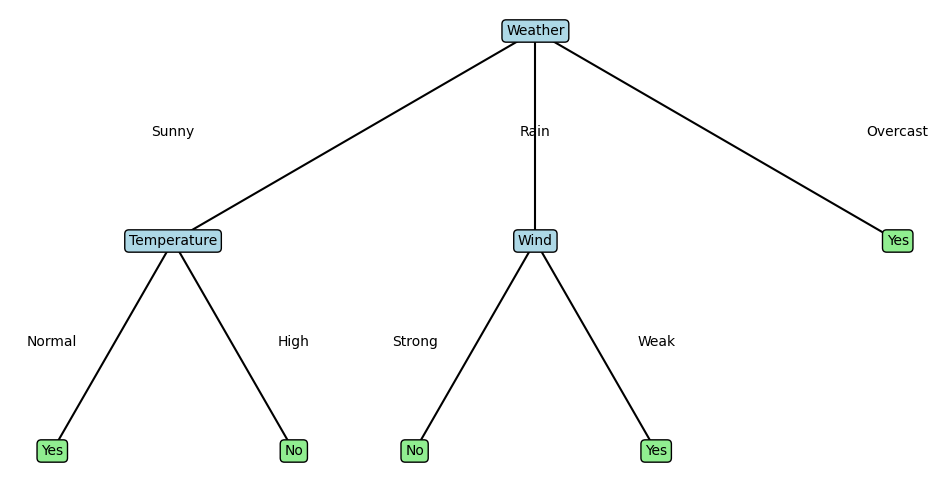

In [7]:
draw_id3_tree(tree)
plt.show()
